In [1]:
from dotenv import load_dotenv
load_dotenv()

import os
data_path = os.getenv('DATA_PATH')
result_path = os.getenv('RESULT_PATH')
root = os.getenv('ROOT')

os.chdir(root)
os.getcwd()

'/disks/qnap3/users/23-miura/coauth-interest'

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import random
from scipy.stats import expon
from scipy.stats import pareto
import os

from importlib import reload

import source.package.util as util
util = reload(util)

In [171]:
year_df = pd.read_pickle(data_path+"paper_detail/year.pickle")
partitions = pd.read_pickle(result_path+"partitions_id_lookup.pickle")
disciplines = partitions["name"]

Calculating best minimal value for power law fit


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


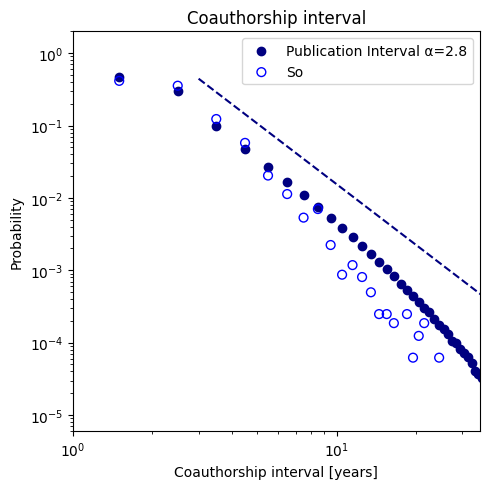

Calculating best minimal value for power law fit


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom, top)


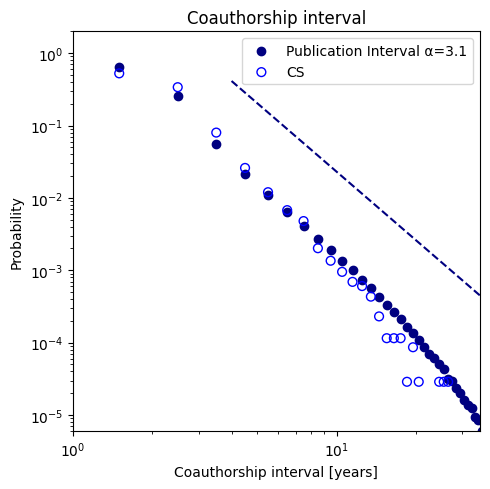

Calculating best minimal value for power law fit


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


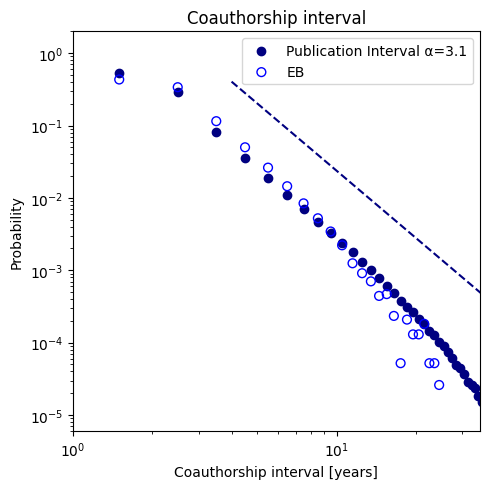

Calculating best minimal value for power law fit


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom, top)


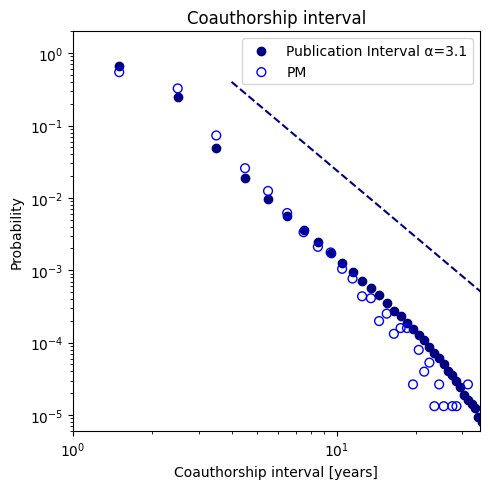

Calculating best minimal value for power law fit


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom, top)


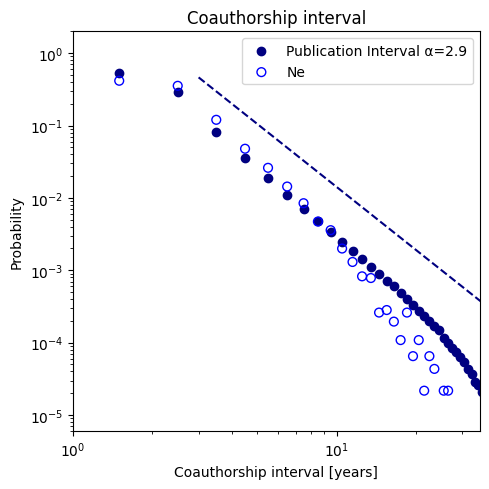

Calculating best minimal value for power law fit


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom, top)


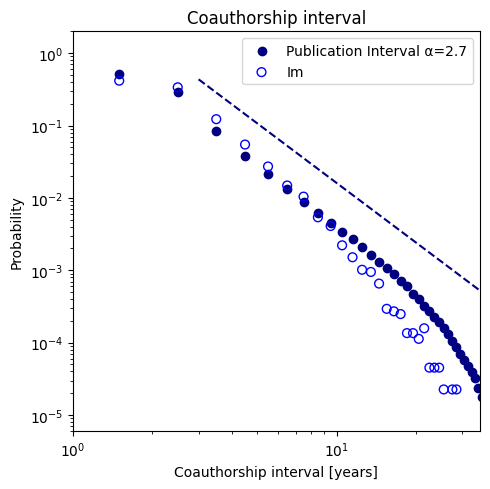

Calculating best minimal value for power law fit


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


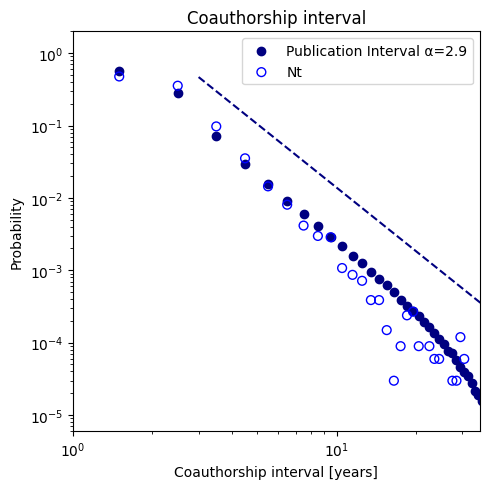

Calculating best minimal value for power law fit


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


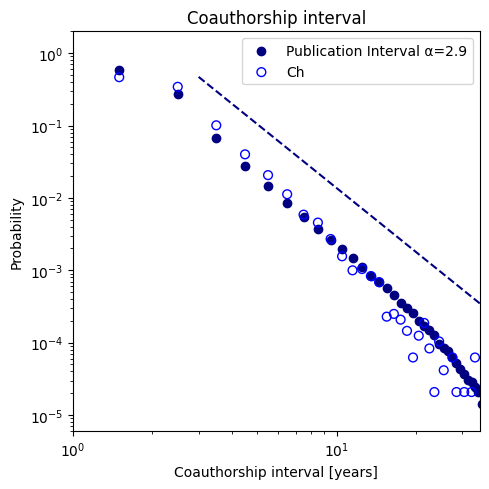

Calculating best minimal value for power law fit


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom, top)


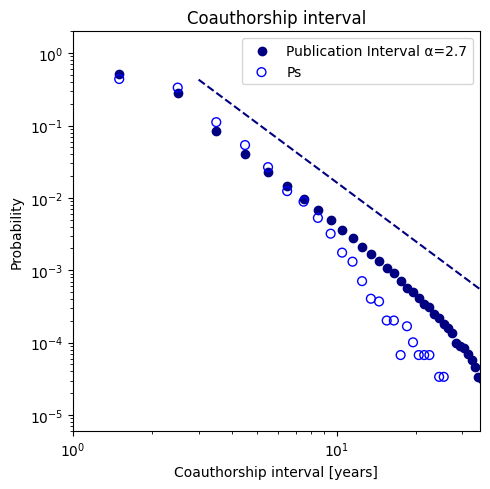

Calculating best minimal value for power law fit


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom, top)


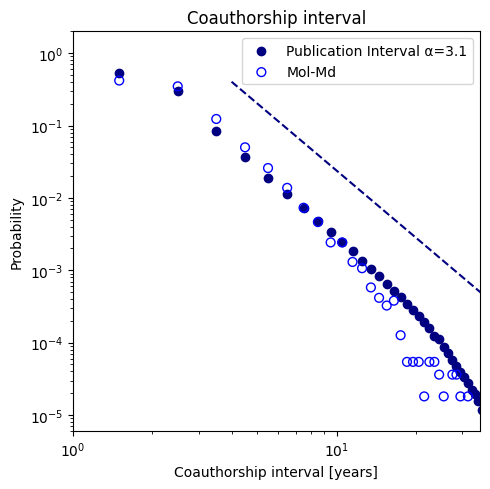

Calculating best minimal value for power law fit


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


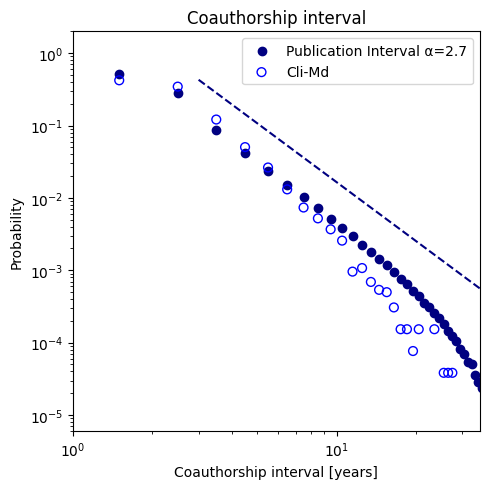

Calculating best minimal value for power law fit


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


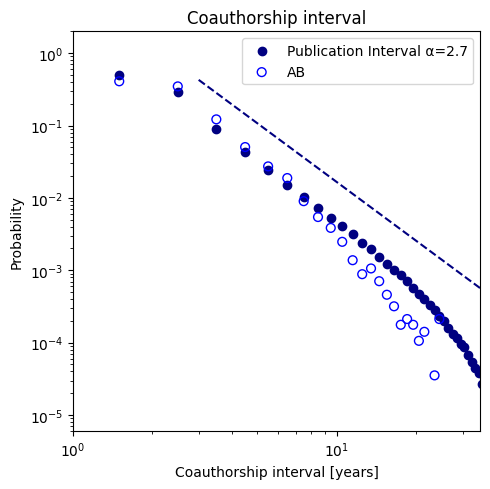

Calculating best minimal value for power law fit


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


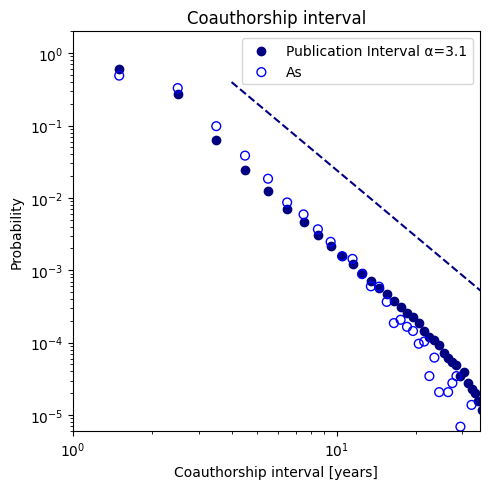

FileNotFoundError: [Errno 2] No such file or directory: '/disks/qnap3/users/23-miura/coauth-interest/data/Ma_5k.pickle'

<Figure size 500x500 with 0 Axes>

In [75]:
for d in disciplines:
    plt.figure(figsize=(5,5))
    result = pd.read_pickle(result_path+f"{d}_5k.pickle")
    authors_valid = pd.read_pickle(result_path+f"authors_valid_{d}.pickle")
    authors_valid = authors_valid.merge(year_df, on="eid",how="left")
    
    interval_pub = authors_valid.sort_values(by="year", ascending=True).groupby("authid")["year"].diff()
    res = interval_pub.dropna()
    
    fit = powerlaw.Fit(res+1,discrete=True)
    fit.power_law.plot_pdf(color='navy', linestyle='--')
    
    util.plotter(res+1,c="navy", label=f"Publication Interval α={fit.alpha:.2}")
    util.plotter(result["year"]+1,s=40,edgecolors="blue",facecolor="none",label=d)
    
    plt.legend()
    plt.xlim(1,35)
    plt.ylim(6*10**-6,2)
    plt.savefig(result_path+f"interval_pub_{d}.png")
    plt.show()

In [19]:
author_sample = authors_valid[authors_valid["authid"] ==36620106200 ]
author_sample.shape[0]
author_sample.sort_values(by="year", ascending=True).groupby("authid")["year"].diff()

496284      NaN
3163684     0.0
21473170    1.0
14598928    0.0
11513982    0.0
           ... 
9443123     0.0
24804       0.0
5826217     0.0
4173602     0.0
21134606    0.0
Name: year, Length: 67, dtype: float64

In [14]:
author_sample.sort_values(by="year", ascending=True)

,eid,authid,authseq,indexname,surname,givenname,doctype,partition,year
496284,77957903232,36620106200,5,Bae H.,Bae,NO GIVENNAME,cp,3.0,2010
3163684,78049232300,36620106200,1,Bae H.,Bae,Hagyoul,ar,3.0,2010
21473170,80051962509,36620106200,2,Bae H.,Bae,Hagyoul,ar,3.0,2011
14598928,79959805572,36620106200,2,Bae H.,Bae,Hagyoul,ar,3.0,2011
11513982,79957586947,36620106200,1,Bae H.,Bae,Hagyoul,ar,3.0,2011
...,...,...,...,...,...,...,...,...,...
9443123,85112624131,36620106200,1,Bae H.,Bae,Hagyoul,ar,3.0,2021
24804,85108093341,36620106200,1,Bae H.,Bae,Hagyoul,ar,3.0,2021
5826217,85117574473,36620106200,1,Bae H.,Bae,Hagyoul,ar,3.0,2021
4173602,85116819830,36620106200,1,Bae H.,Bae,Hagyoul,cp,3.0,2021


Calculating best minimal value for power law fit


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


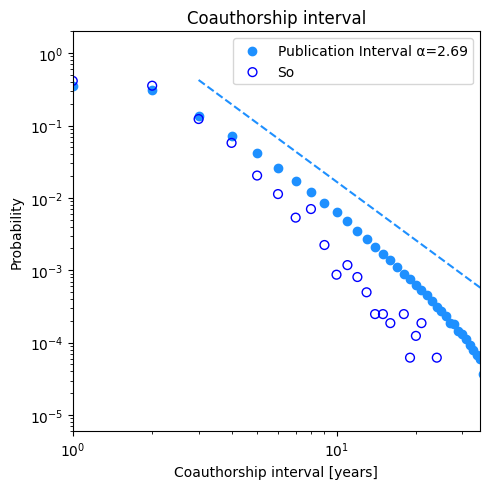

Calculating best minimal value for power law fit


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom, top)


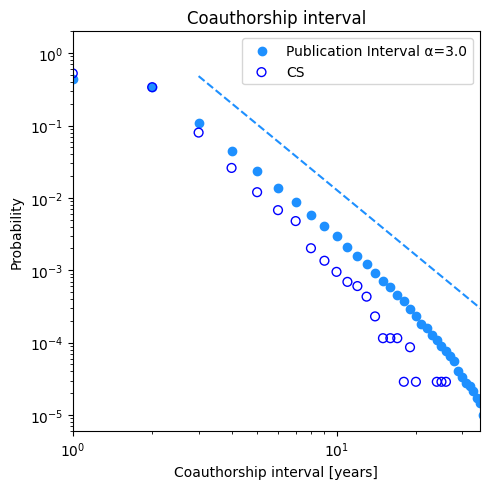

Calculating best minimal value for power law fit


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


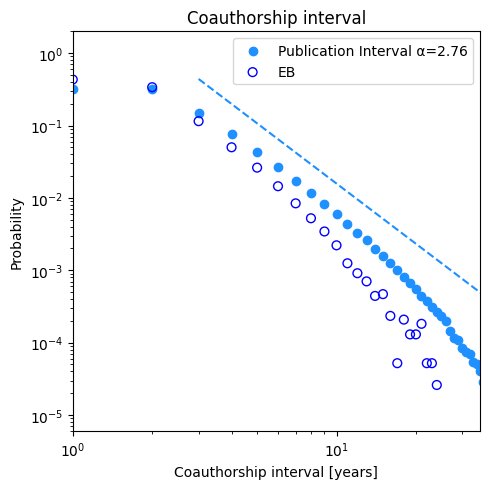

Calculating best minimal value for power law fit


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom, top)


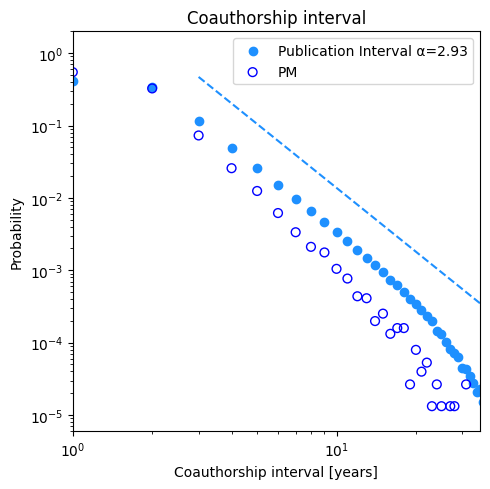

Calculating best minimal value for power law fit


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom, top)


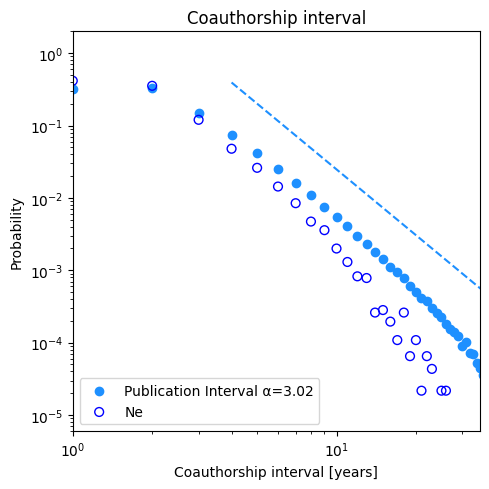

Calculating best minimal value for power law fit


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom, top)


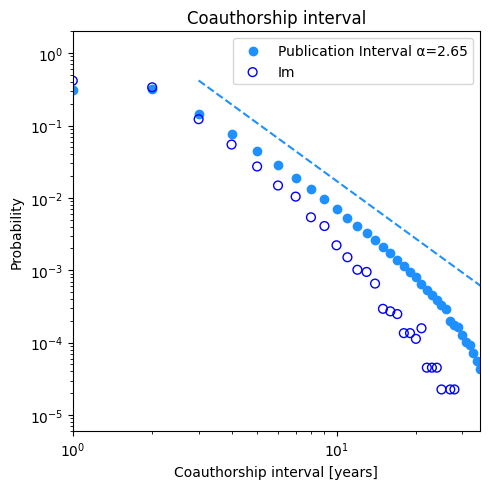

Calculating best minimal value for power law fit


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


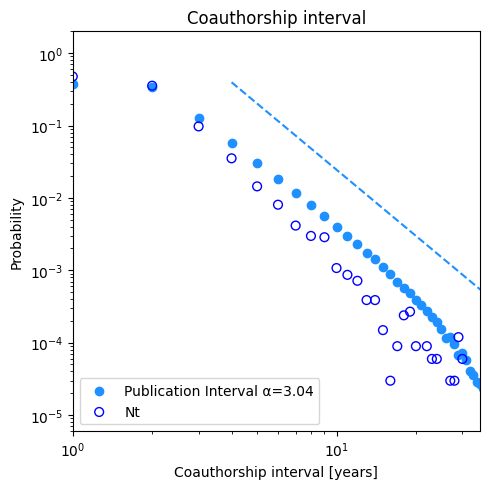

Calculating best minimal value for power law fit


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


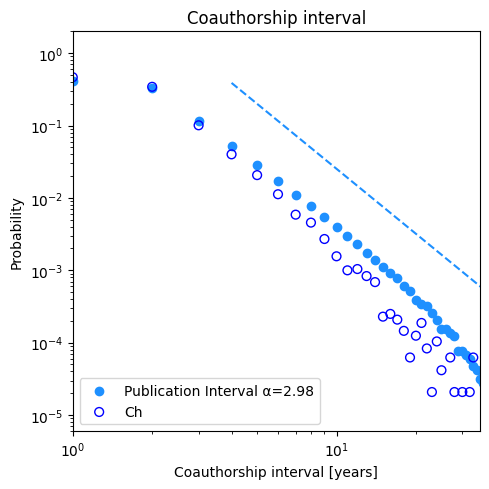

Calculating best minimal value for power law fit


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom, top)


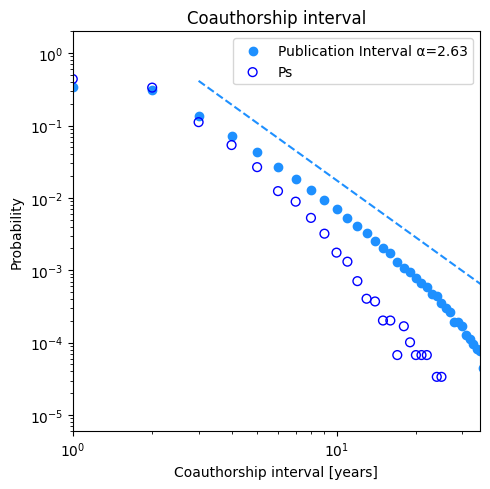

Calculating best minimal value for power law fit


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom, top)


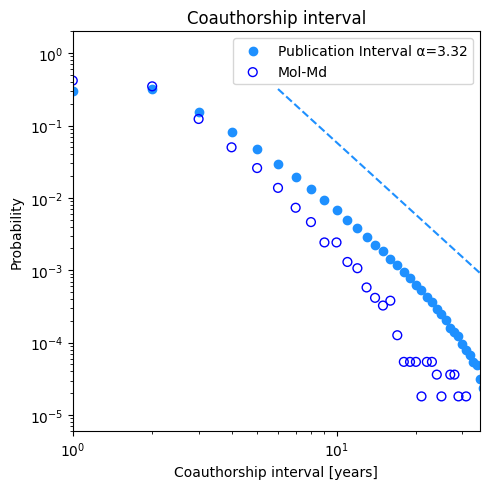

Calculating best minimal value for power law fit


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom, top)


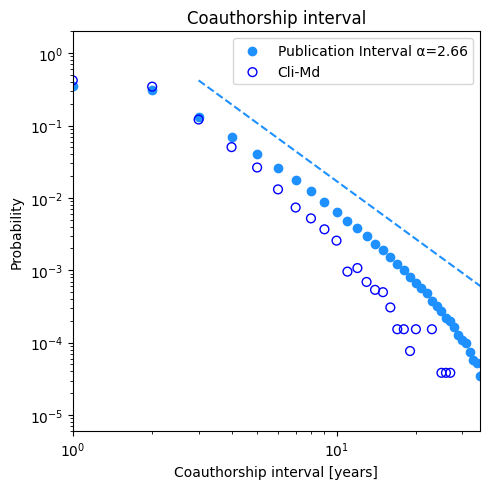

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit


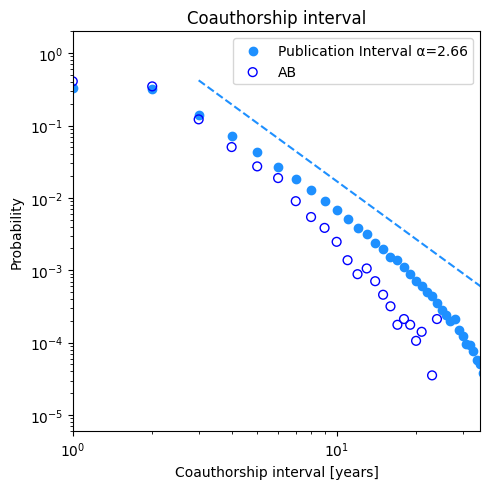

Calculating best minimal value for power law fit


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


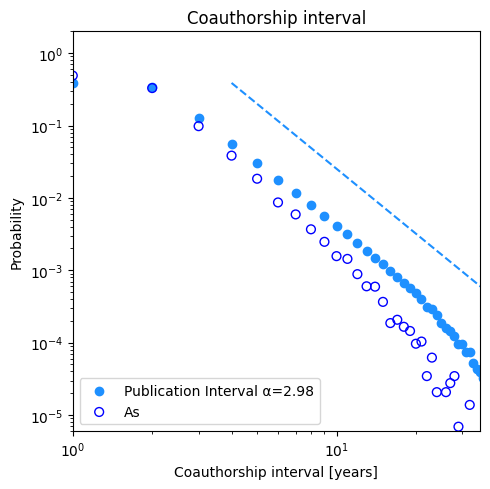

In [233]:
import powerlaw

for d in disciplines:
    plt.figure(figsize=(5,5))
    result = pd.read_pickle(result_path+f"{d}_5k.pickle")
    authors_valid = pd.read_pickle(result_path+f"authors_valid_{d}.pickle")
    authors_valid = authors_valid.merge(year_df, on="eid",how="left")
    
    interval_pub_first = authors_valid[authors_valid["authseq"]==1].sort_values(by="year", ascending=True).groupby("authid")["year"].diff()
    interval_pub_first.to_pickle(result_path+f"interval_pub_first{d}.pickl")
    res = interval_pub_first.dropna()
    
    fit = powerlaw.Fit(res+1,discrete=True)
    fit.power_law.plot_pdf(color='dodgerblue', linestyle='--')
    
    util.plotter(res+1,c="dodgerblue", label=f"Publication Interval α={fit.alpha:.3}")
    util.plotter(result["year"]+1,s=40,edgecolors="blue",facecolor="none",label=d)
    
    plt.legend()
    plt.xlim(1,35)
    plt.ylim(6*10**-6,2)
    plt.savefig(result_path+f"interval_pub_first_{d}.png")
    plt.show()

In [ ]:
# for d in disciplines:
d = "PM"
# authors_valid = pd.read_pickle(result_path+f"authors_valid_{d}.pickle")
author_count = authors_valid.groupby("eid")["authid"].count()
author_count[author_count>1]

In [94]:
element_counts[:100]

10339199400    2011
10739665900    1631
35227423300    1194
55262348100    1045
8931086800      893
               ... 
7004390647      340
7003626736      339
7003879236      334
16198427400     333
7003916079      330
Name: source_authid, Length: 100, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


----------
So
Calculating best minimal value for power law fit
alpha: 7.099046364404517 0.09079147634337303
log_odds_ratio: -1.0782779422882343 0.28090973768655814


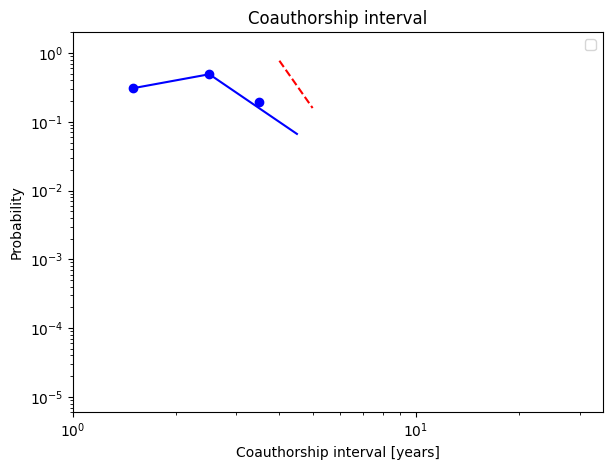

Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 2.85338552375

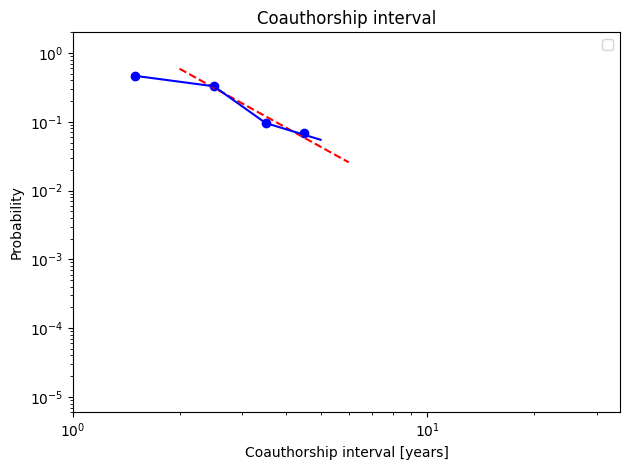

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 2.66242136602

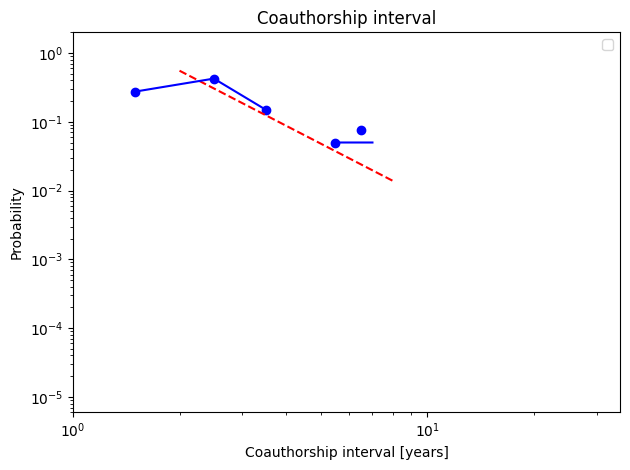

Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 6.282137993989747 0.02583194560154145
log_odds_ratio: -1.0782779422882343 0.28090973768655814


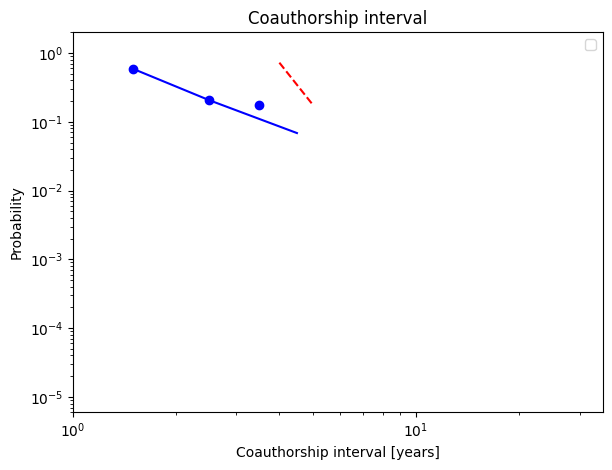

Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

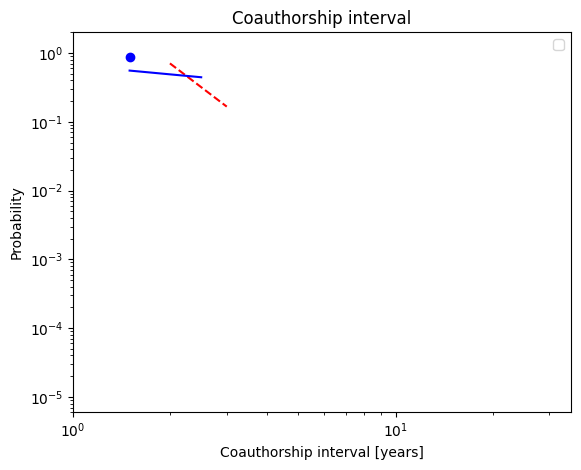

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
----------ess: 75%
CS
Calculating best minimal value for power law fi

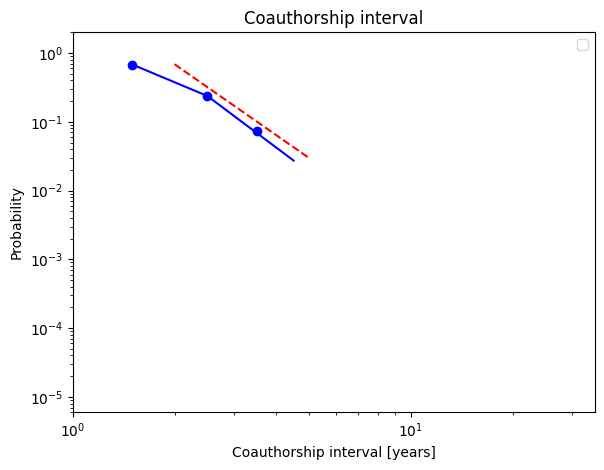

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 8.05095166365

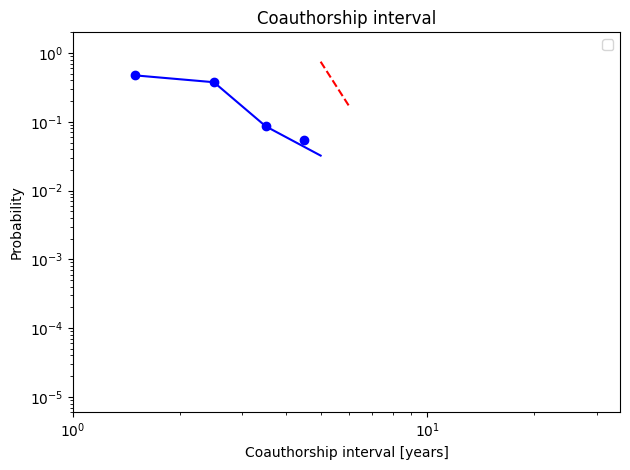

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 4.93325927805

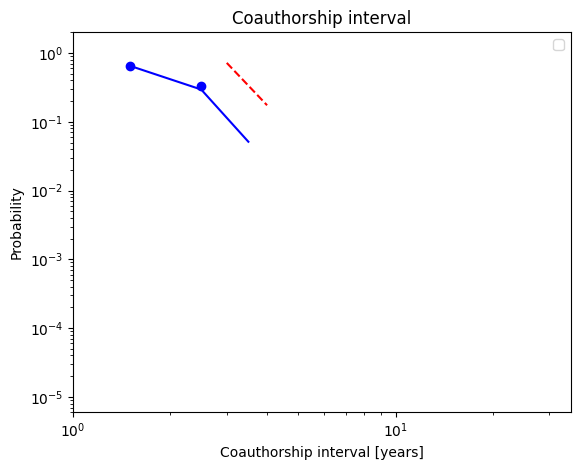

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 6.612928954313721 0.05494109596700647
log_odds_ratio: -1.0782779422882343 0.28090973768655814


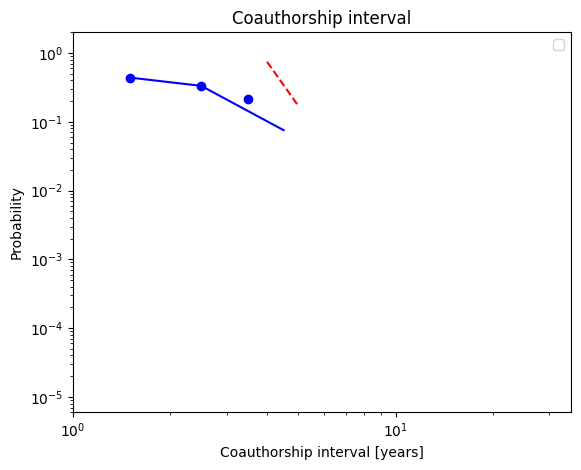

Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

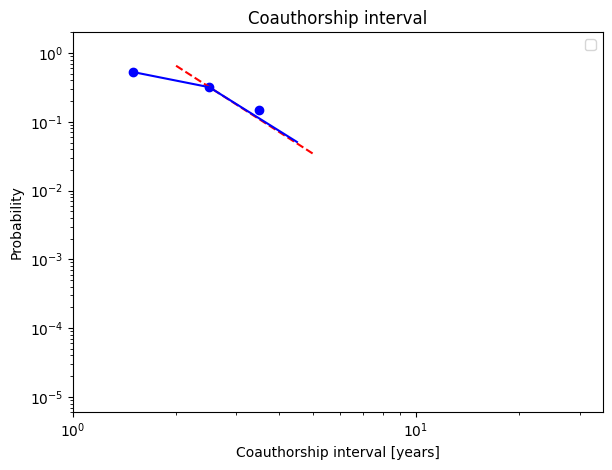

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 3.1047689197111046 0.0558400866854305
log_odds_ratio: -1.0782779422882343 0.28090973768655814


/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom, top)


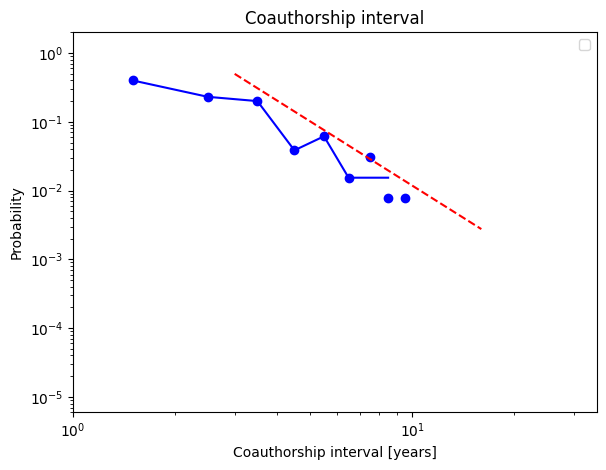

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 4.423359934477375 0.08650494701937461
log_odds_ratio: -1.0782779422882343 0.28090973768655814


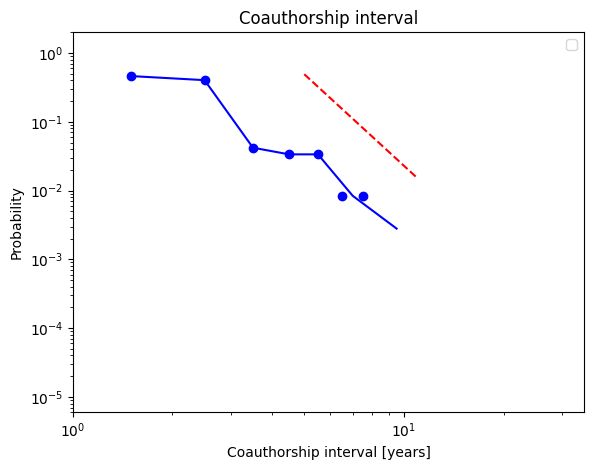

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 3.9730558172250756 0.09964600085049768
log_odds_ratio: -1.0782779422882343 0.28090973768655814


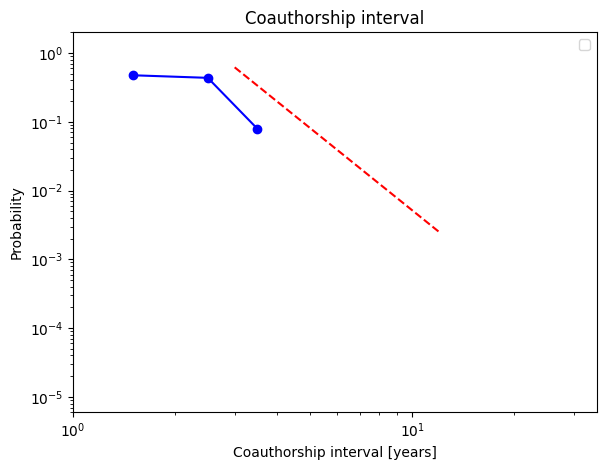

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 3.7012869444963123 0.08125075693144668
log_odds_ratio: -1.0782779422882343 0.28090973768655814


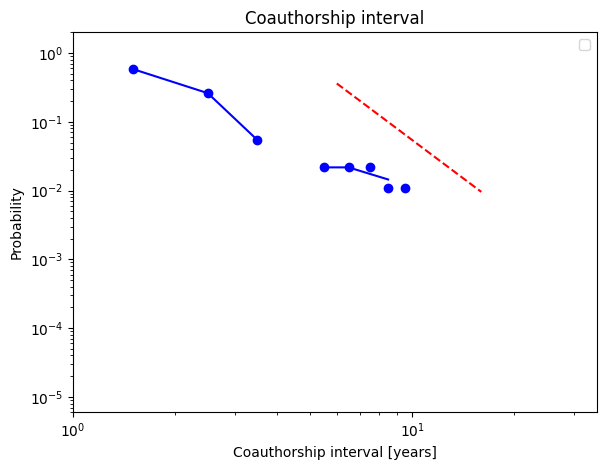

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 7.019224152744982 0.026557913733705862
log_odds_ratio: -1.0782779422882343 0.28090973768655814


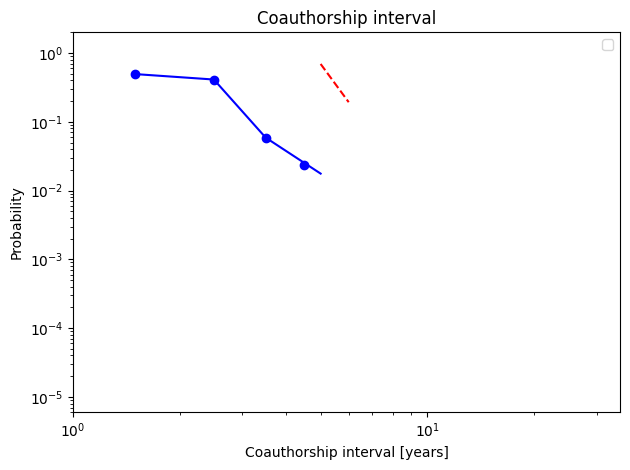

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 6.701971819179546 0.025436505046899205
log_odds_ratio: -1.0782779422882343 0.28090973768655814


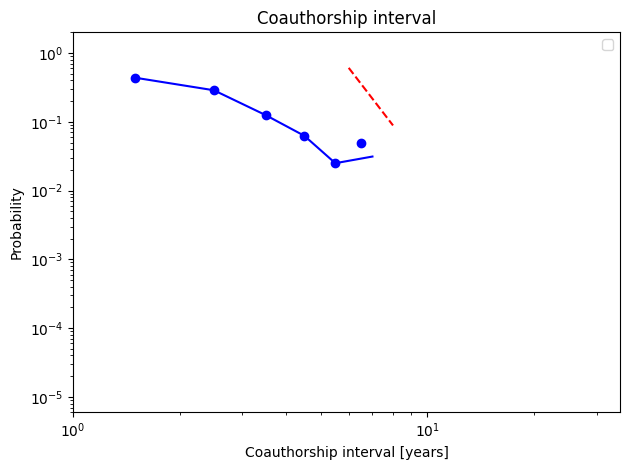

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 2.6265152368935953 0.07004160186393871
log_odds_ratio: -1.0782779422882343 0.28090973768655814


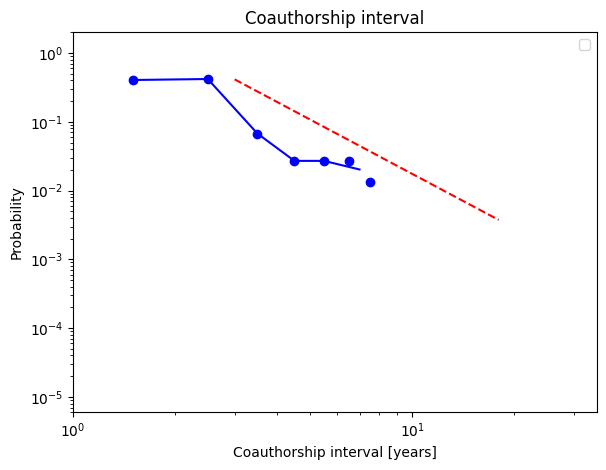

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 3.472563649052319 0.05375045460025296
log_odds_ratio: -1.0782779422882343 0.28090973768655814


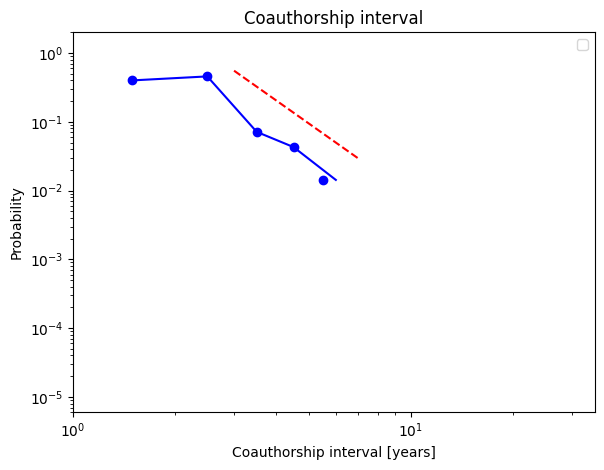

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
----------ess: 83%
PM
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fi

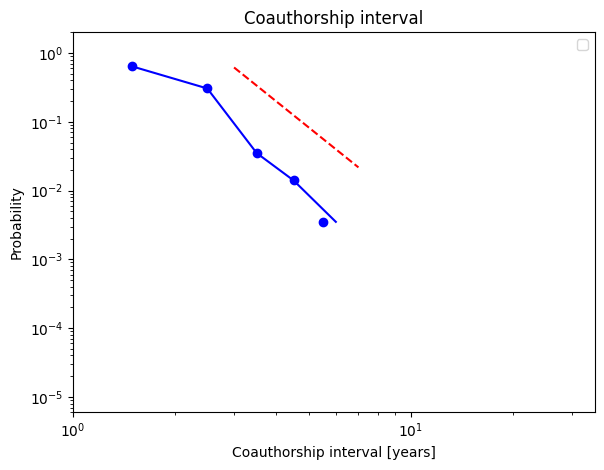

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 3.4650512221329923 0.07028306799333484
log_odds_ratio: -1.0782779422882343 0.28090973768655814


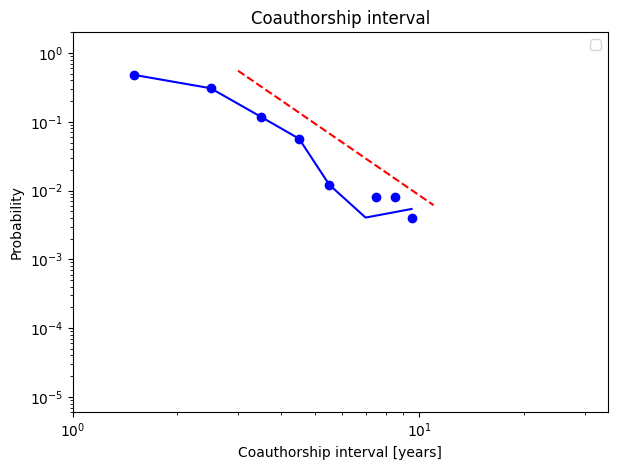

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 4.594334999517198 0.020739251486633026
log_odds_ratio: -1.0782779422882343 0.28090973768655814


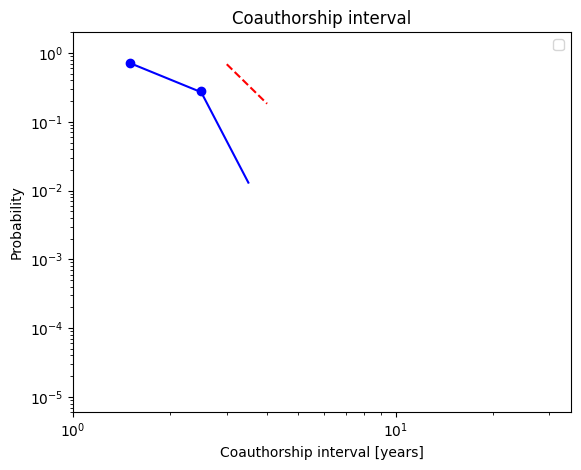

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 3.1826827511761264 0.07618566550194872
log_odds_ratio: -1.0782779422882343 0.28090973768655814


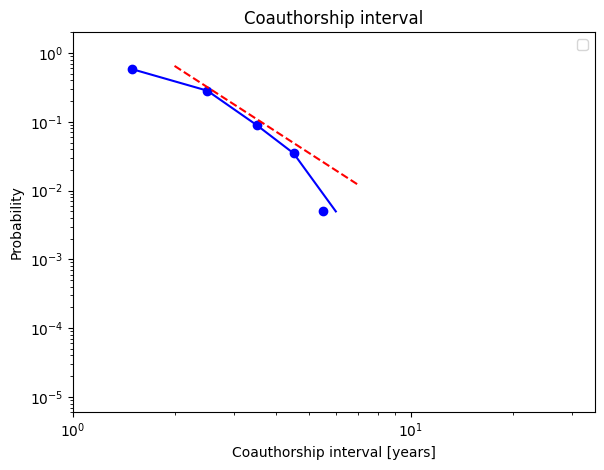

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

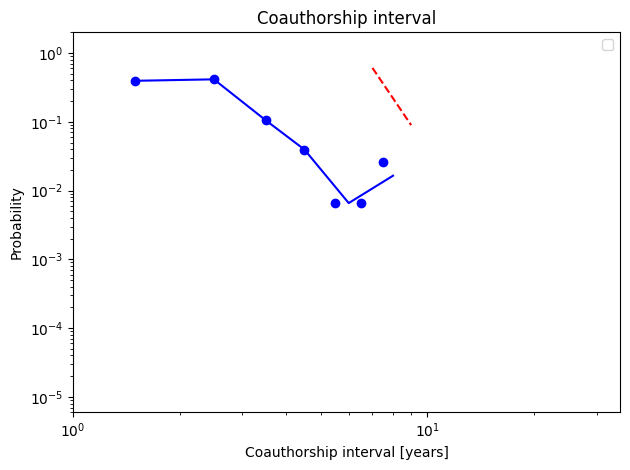

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
----------ess: 00%
Ne
Calculating best minimal value for power law fi

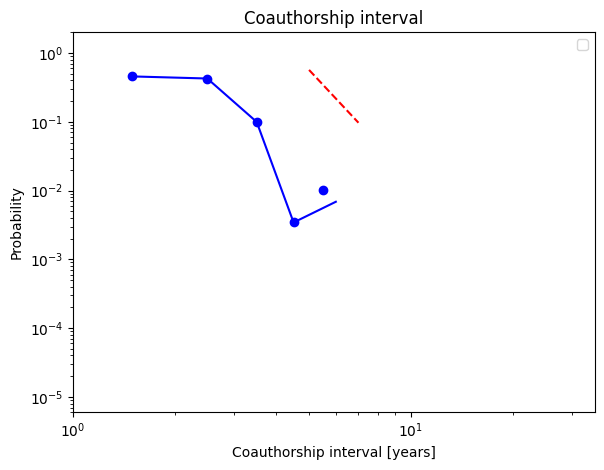

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 3.1057271461414664 0.043479767665760394
log_odds_ratio: -1.0782779422882343 0.28090973768655814


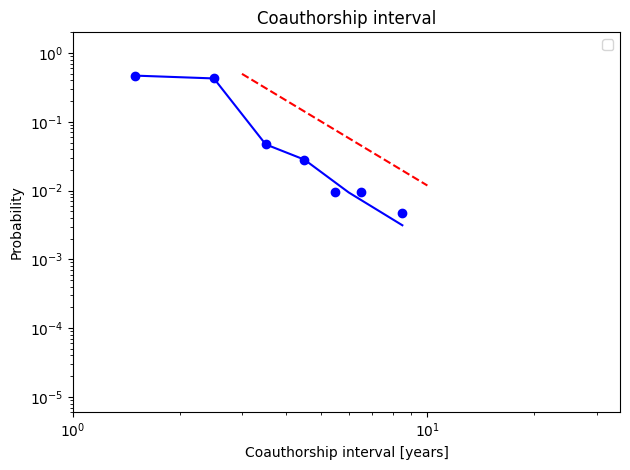

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 5.850366228734107 0.07711511587949338
log_odds_ratio: -1.0782779422882343 0.28090973768655814


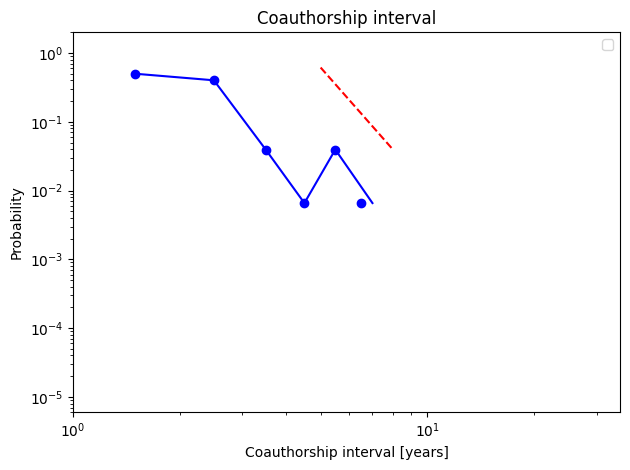

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 4.0952565073853275 0.0629528273356067
log_odds_ratio: -1.0782779422882343 0.28090973768655814


/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom, top)


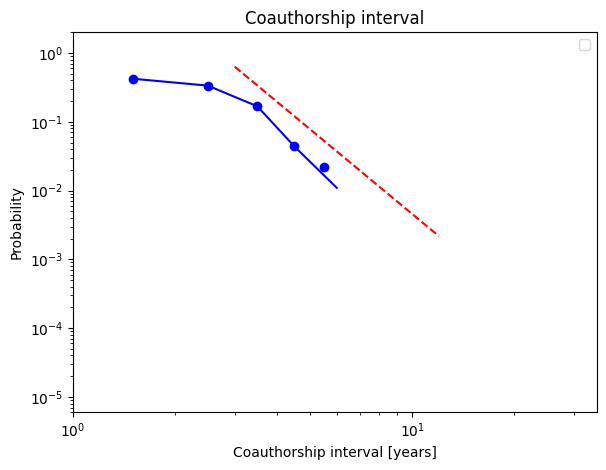

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

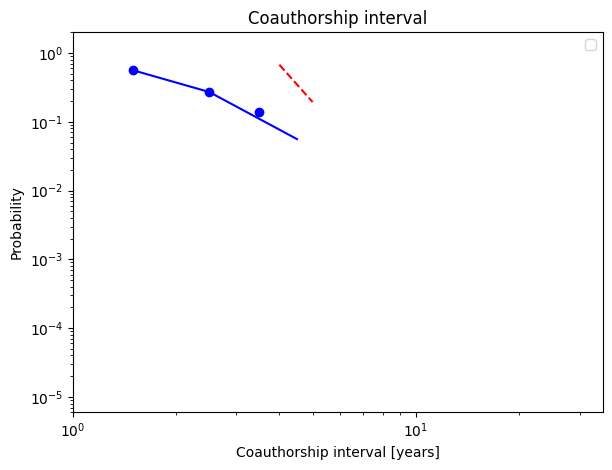

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 7.019224152744982 0.026557913733705862
log_odds_ratio: -1.0782779422882343 0.28090973768655814


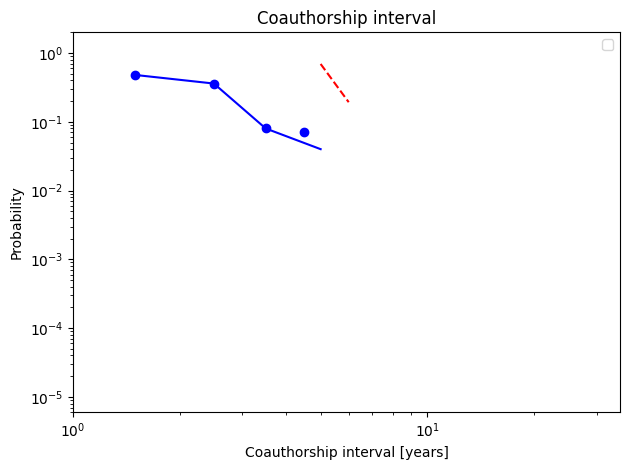

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 2.8460028762217586 0.05267395366101535
log_odds_ratio: -1.0782779422882343 0.28090973768655814


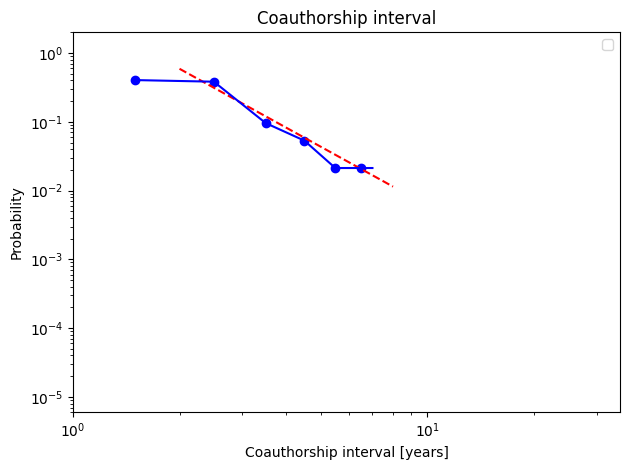

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
----------ess: 83%
Im
Calculating best minimal value for power law fi

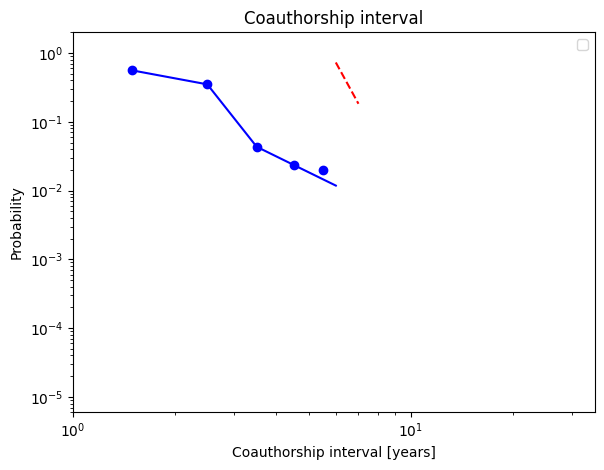

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 4.51899463010

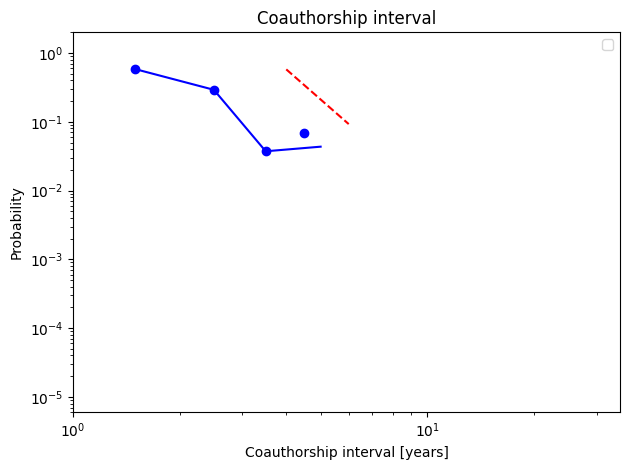

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 4.856994166427938 0.029212541947905013
log_odds_ratio: -1.0782779422882343 0.28090973768655814


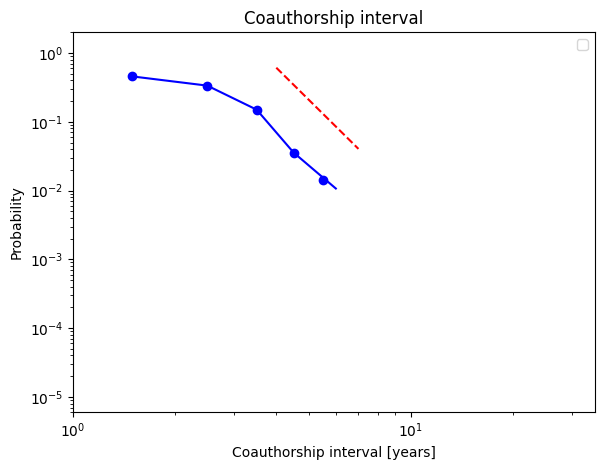

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 3.72343508904

/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom, top)


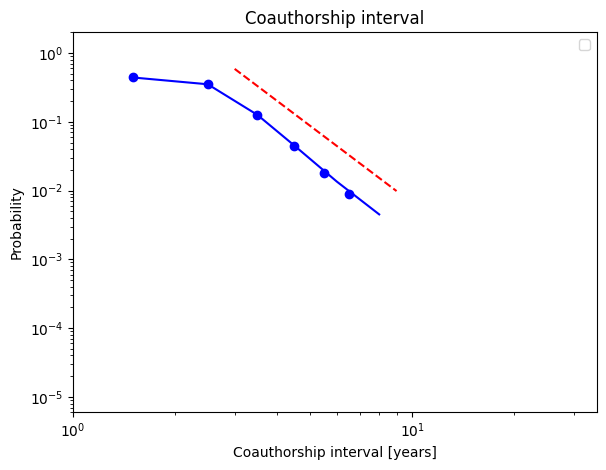

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 2.7876703895414217 0.06709759024144646
log_odds_ratio: -1.0782779422882343 0.28090973768655814


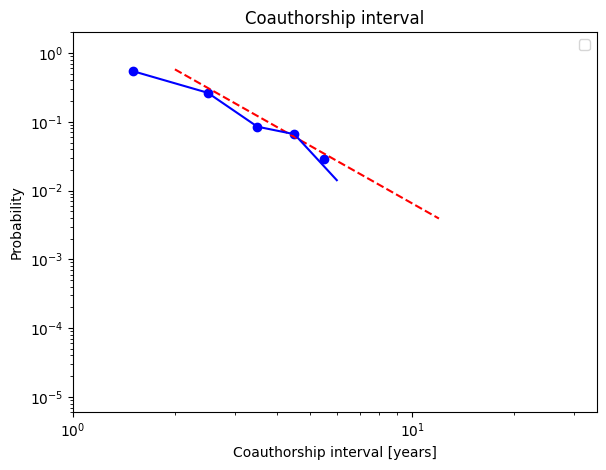

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 2.7411609134861097 0.04022855313066365
log_odds_ratio: -1.0782779422882343 0.28090973768655814


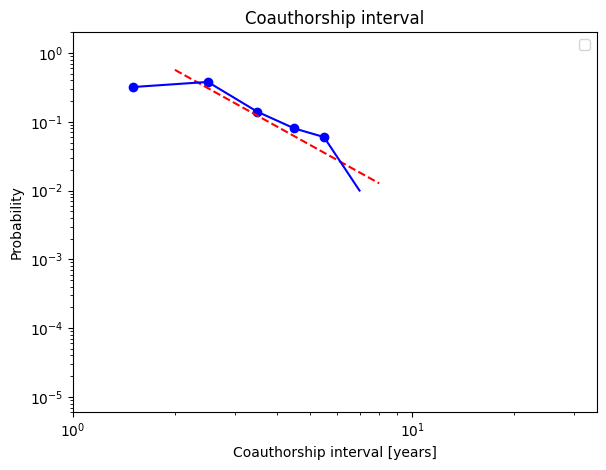

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 3.655748230714175 0.060596753967605776
log_odds_ratio: -1.0782779422882343 0.28090973768655814


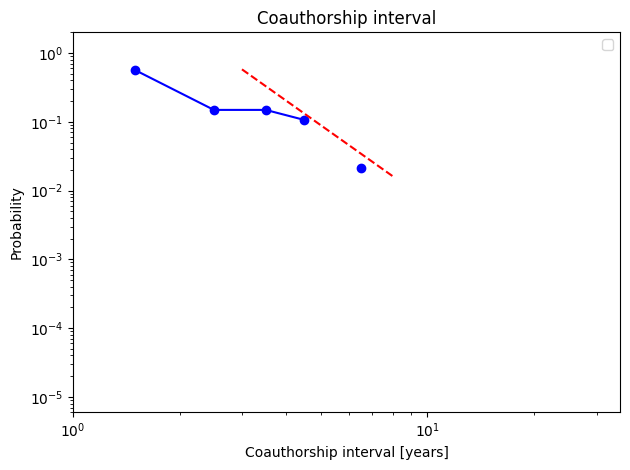

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 3.465932923834814 0.043239010844016046
log_odds_ratio: -1.0782779422882343 0.28090973768655814


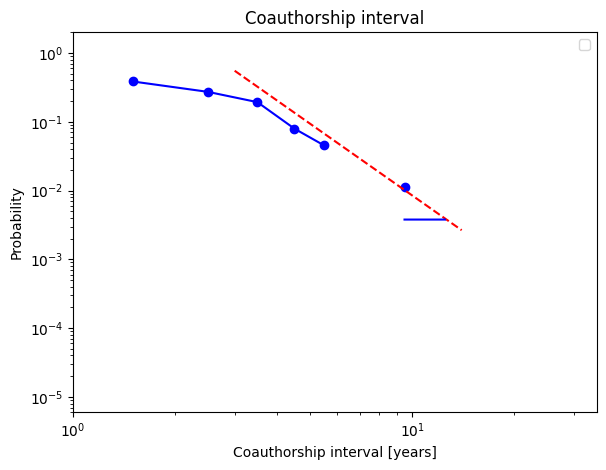

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
----------ess: 83%
Nt
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fi

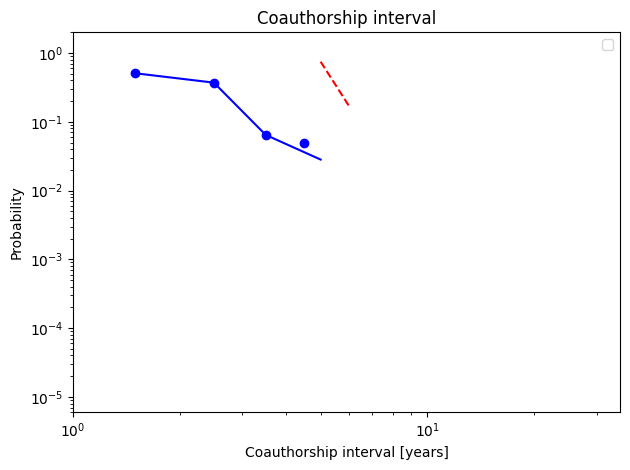

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 7.625109349595651 0.02297411735089927
log_odds_ratio: -1.0782779422882343 0.28090973768655814


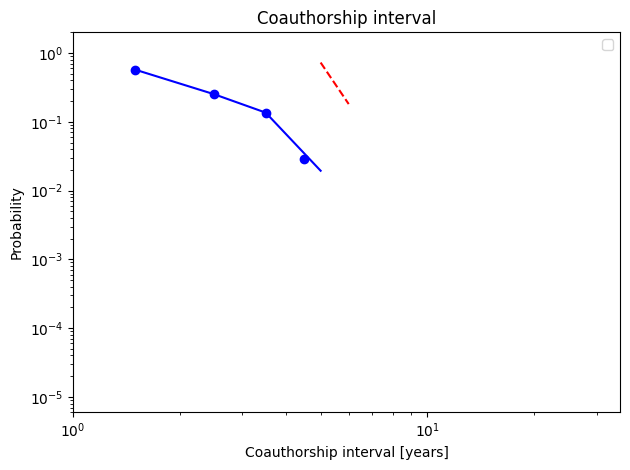

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 5.80971385826

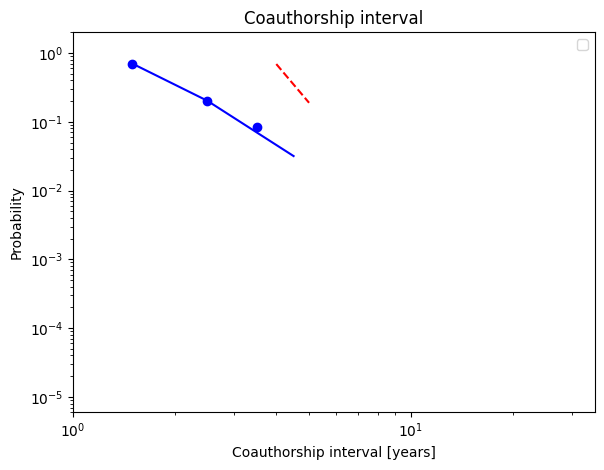

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 3.360128692917777 0.07269990139805527
log_odds_ratio: -1.0782779422882343 0.28090973768655814


/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom, top)


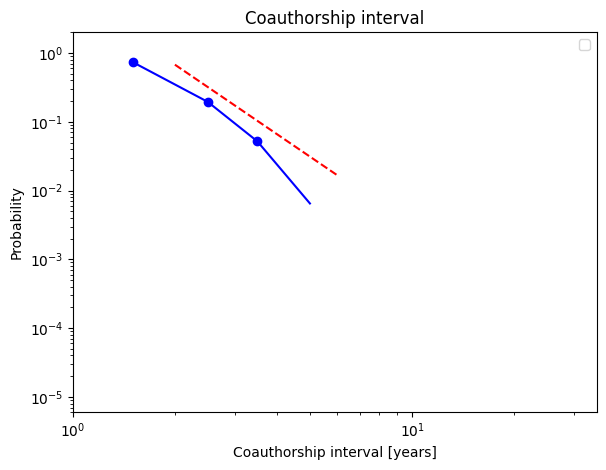

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 4.3625382583976915 0.06369861987161218
log_odds_ratio: -1.0782779422882343 0.28090973768655814


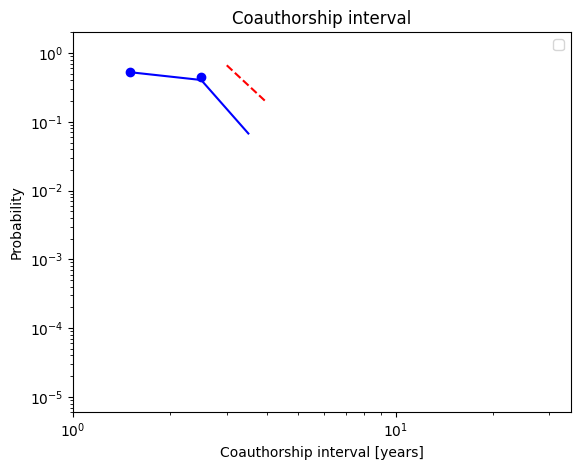

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 5.169133903057448 0.061016121474129936
log_odds_ratio: -1.0782779422882343 0.28090973768655814


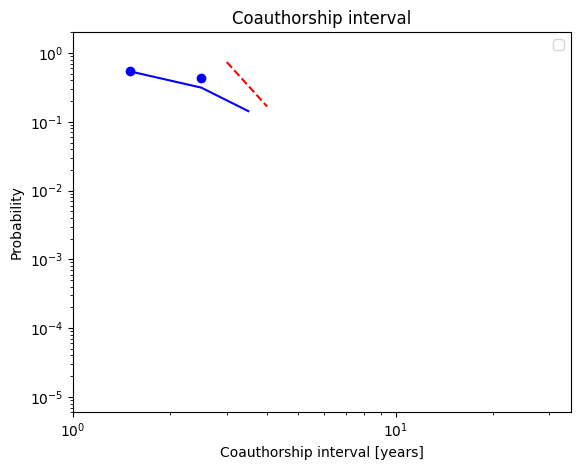

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 2.88131871813

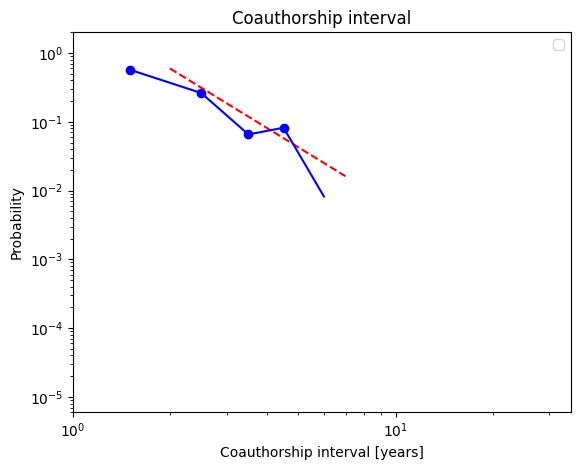

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
----------ess: 83%
Ch
Calculating best minimal value for power law fit
alpha: 4.224945202025005 0.031253874114463676
log_odds_ratio: -1.0782779422882343 0.28090973768655814


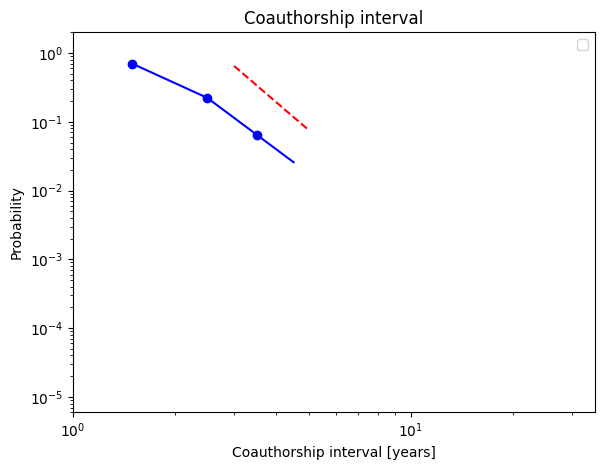

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 7.5833115107907965 0.0663342042538907
log_odds_ratio: -1.0782779422882343 0.28090973768655814


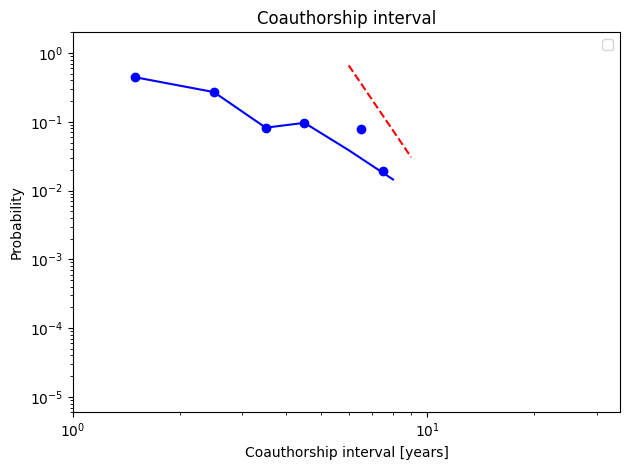

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 2.41368468850

/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom, top)


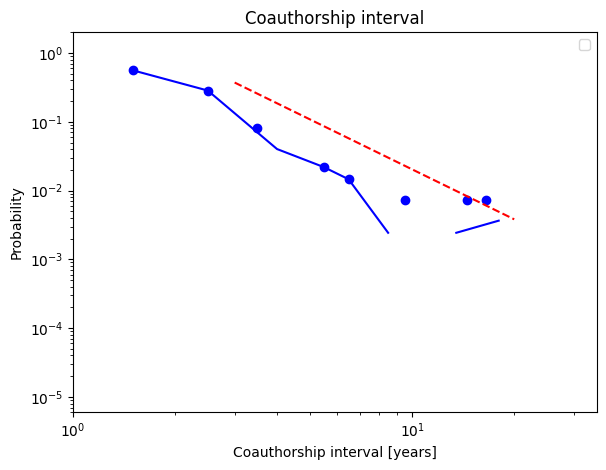

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 6.857476427941312 0.073883674346778
log_odds_ratio: -1.0782779422882343 0.28090973768655814


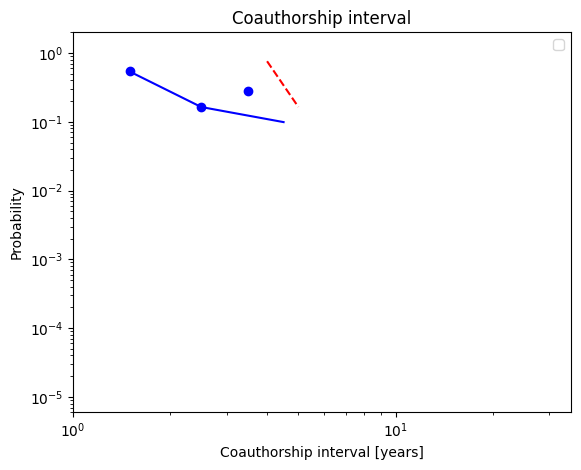

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 2.739039690424675 0.06981626353606696
log_odds_ratio: -1.0782779422882343 0.28090973768655814


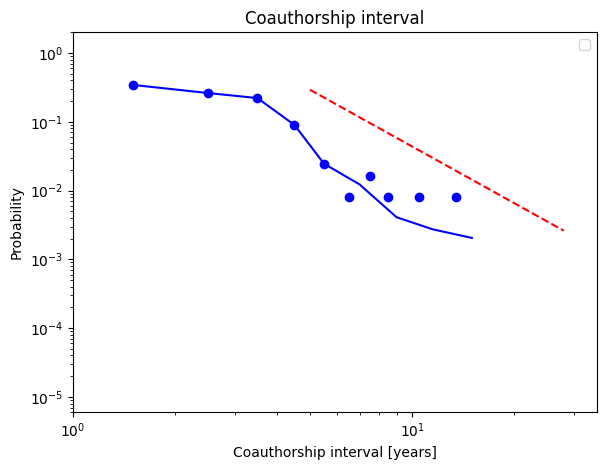

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 8.225697862711497 0.02776433567467307
log_odds_ratio: -1.0782779422882343 0.28090973768655814


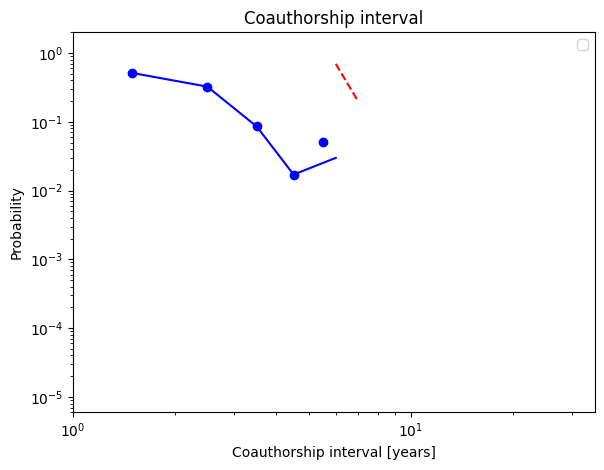

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 3.0556048441390598 0.07531467229744893
log_odds_ratio: -1.0782779422882343 0.28090973768655814


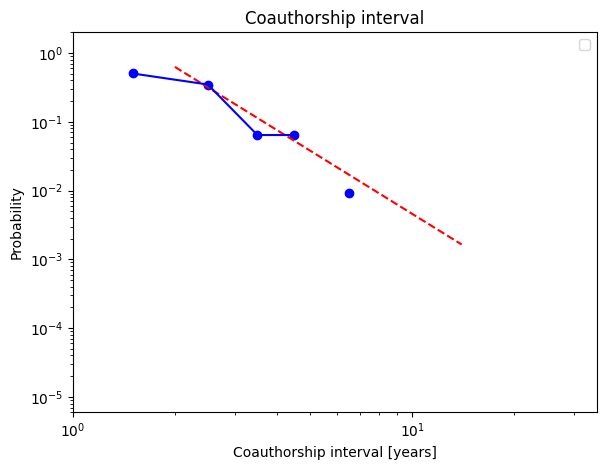

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 4.1840885206664735 0.04332618103730779
log_odds_ratio: -1.0782779422882343 0.28090973768655814


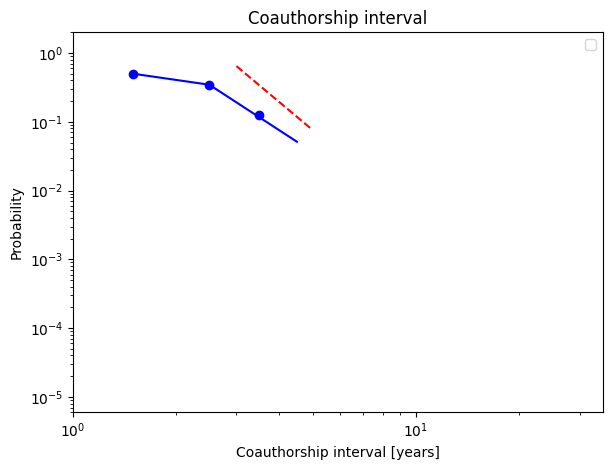

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 4.145380635448854 0.08748806335082304
log_odds_ratio: -1.0782779422882343 0.28090973768655814


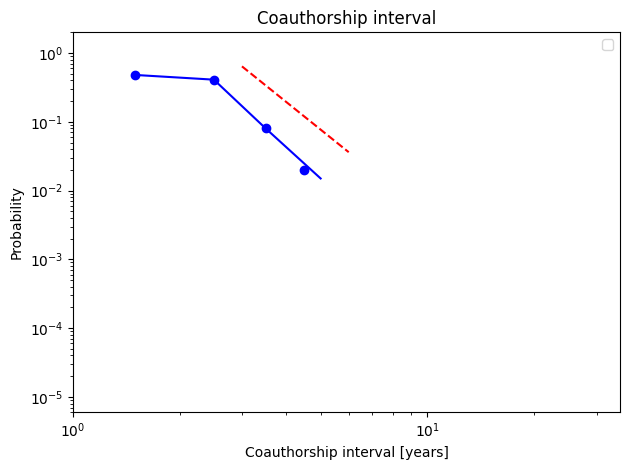

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
----------ess: 85%
Ps
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fi

/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom, top)


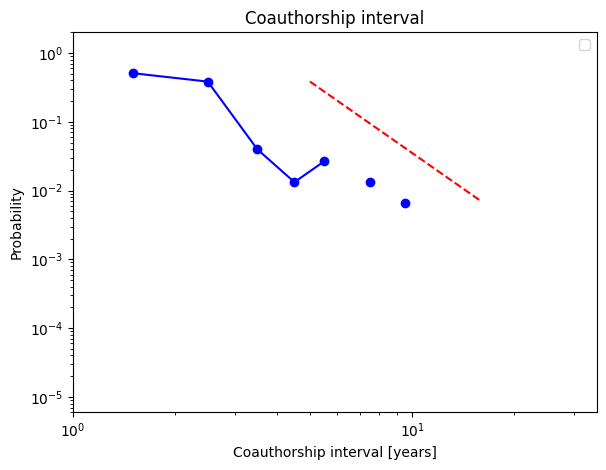

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 3.61815414942

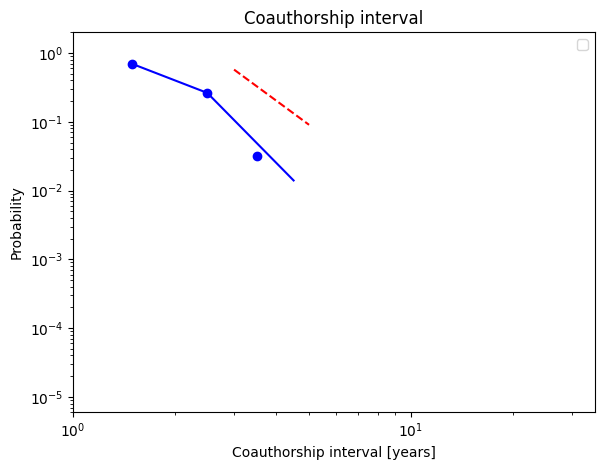

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 4.9332592780568945 0.031018181695985247
log_odds_ratio: -1.0782779422882343 0.28090973768655814


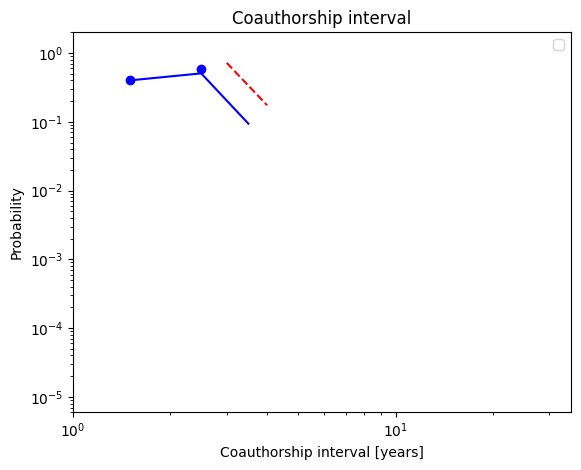

Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 9.43039270007804 0.028562038081244467
log_odds_ratio: -1.0782779422882343 0.28090973768655814


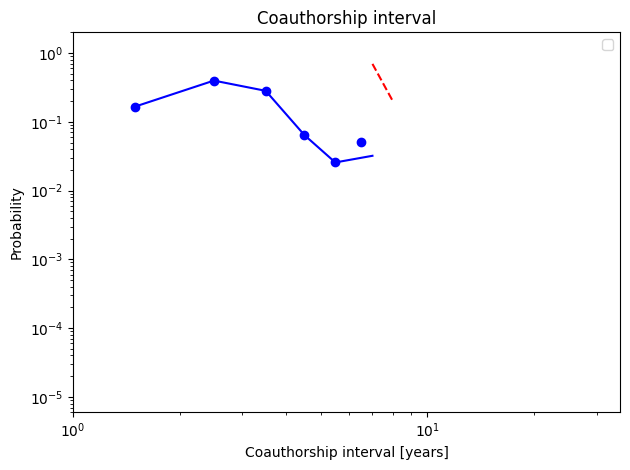

Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 3.75658117255

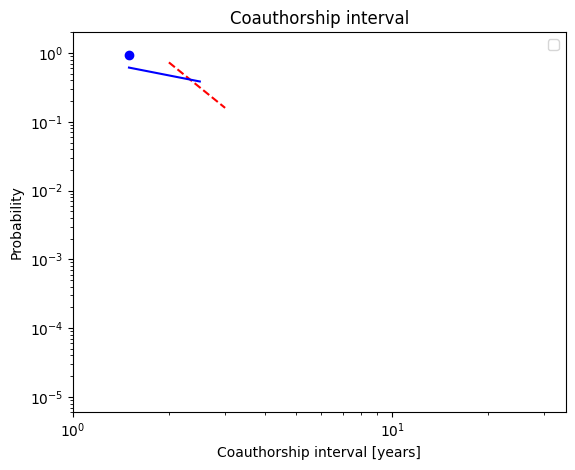

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 4.917011899868259 0.0347950930777583
log_odds_ratio: -1.0782779422882343 0.28090973768655814


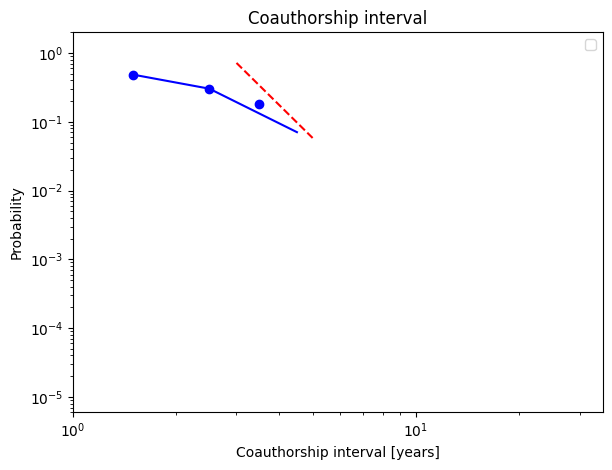

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: nan nan


Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
/usr/local/lib/python3.10/dist-packages/powerlaw.py:1156: RuntimeWarning: invalid value encountered in scalar divide
  self.alpha = 1 + (self.n / sum(log(data / (self.xmin - .5))))
/usr/local/lib/python3.10/dist-packages/powerlaw.py:1170: RuntimeWarning: invalid value encountered in scalar divide
  return 1 + len(data)/sum(log(data / (self.xmin)))
Not enough data. Returning nan
Not enough data. Returning nan


IndexError: index -1 is out of bounds for axis 0 with size 0

Error in callback <function _draw_all_if_interactive at 0x7efc539e4700> (for post_execute):


ValueError: Data has no positive values, and therefore cannot be log-scaled.

ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 640x480 with 1 Axes>

In [231]:
for d in disciplines:
    result = pd.read_pickle(result_path+f"{d}_5k.pickle")
    element_counts = result["source_authid"].value_counts()
    sample_from = element_counts[element_counts>500]
    
    alphas = []
    print("----------")
    print(d)
    for i in range(100):
        data = result[result["source_authid"]==element_counts.index[i]]["year"].values+1
        # data = data[data>0]
        fit = powerlaw.Fit(data,discrete=True)
        # print(fit.sigma)
        # R, p = fit.distribution_compare('power_law', 'lognormal',normalized_ratio=True)
        
        if fit.D>0.1: continue
        alphas.append(fit.alpha)
        
        if i%10==0:
            util.plotter(data, c="blue",count="probability",label=f"{sample_author_id} {len(data)}")
            print("alpha:", fit.power_law.alpha, fit.power_law.D)
            # print(fit.power_law.xmin)
            fit.power_law.plot_pdf(color='r', linestyle='--',label=d)
            powerlaw.plot_pdf(data, color='b', linestyle='-')
            print("log_odds_ratio:",R, p)
            plt.xlim(1,35)
            plt.ylim(6*10**-6,2)
            plt.show()
            # hist, bins = util.plotter(data,title="coauthorship interval",c='blue',s=25, u= "year", l=f"{disc} {len(data)}",count="probability", plot="power-law")
    alphas = np.array(alphas)
    alphas = alphas[~np.isnan(alphas)]
    np.save(result_path+f"{d}_alphas_100",alphas)

In [174]:
disciplines.pop(23)

'Ma'

3.0447012056116156


(None, 3.0489773287054347)

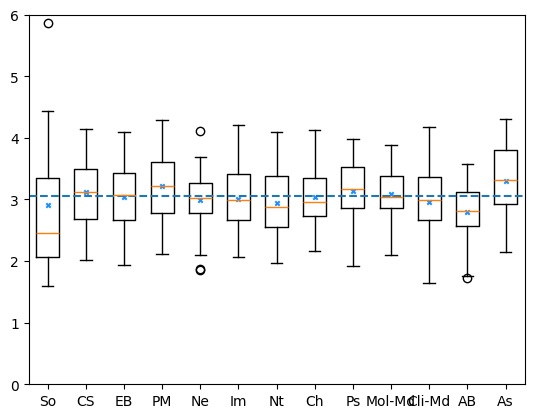

In [225]:
alpha_lists = [np.load(result_path+f"{d}_alphas_100.npy") for d in disciplines]
mean = [np.mean(np.load(result_path+f"{d}_alphas_100.npy")) for d in disciplines]
# 箱ひげ図の位置を指定
positions = [i for i in range(len(disciplines))]

plt.boxplot(alpha_lists, positions=positions, widths=0.6)
plt.scatter(positions, mean, color='dodgerblue', marker='x', s=10)  # Add 'x' mark at the mean

# x軸の目盛りを設定
plt.xticks(positions, disciplines)
plt.ylim(0,6)

alpha_lists_exploded=[]
for i in range(len(alpha_lists)):
    alpha_lists_exploded = alpha_lists_exploded +list(alpha_lists[i])
plt.hlines(np.mean(alpha_lists_exploded),-0.5,12.5,linestyles="--")
print(np.mean(mean)), np.mean(alpha_lists_exploded)

[2.9125365177118305, 3.117964211880694, 3.04782970770138, 3.21828313057887, 2.9939564578443196, 3.0097056138610196, 2.9402538321401805, 3.043764297837377, 3.1403166647883007, 3.091540149232073, 2.9666128446431452, 2.7926298882907363, 3.3057223564410747]
[11  0  6 10  4  5  7  2  9  1  8  3 12]


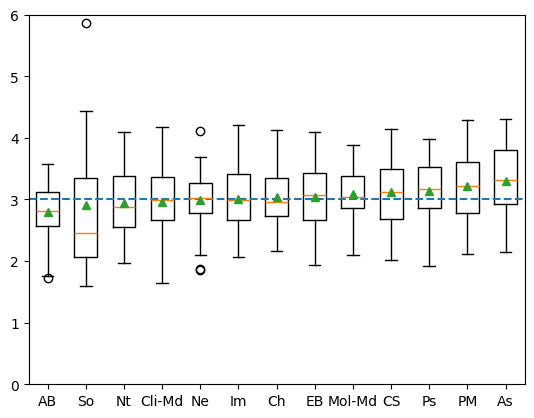

In [216]:
mean = [np.mean(np.load(result_path+f"{d}_alphas_100.npy")) for d in disciplines]
print(mean)
sort_index = np.argsort(mean)
print(sort_index)
alpha_lists_sorted = [alpha_lists[sort_index[i]] for i in range(len(alpha_lists))]
plt.boxplot(alpha_lists_sorted, positions=positions, widths=0.6,showmeans =True)
# plt.scatter(positions, color='dodgerblue', marker='x', s=10)  # Add 'x' mark at the mean

# x軸の目盛りを設定
plt.xticks(positions, [disciplines.values[sort_index[i]] for i in range(len(disciplines))])
plt.ylim(0,6)
plt.hlines(np.mean(alpha_lists),-0.5,12.5,linestyles="--")

In [208]:
disciplines

0         So
1         CS
2         EB
3         PM
5         Ne
6         Im
7         Nt
9         Ch
11        Ps
4     Mol-Md
13    Cli-Md
16        AB
17        As
Name: name, dtype: object

In [205]:
sort_index

array([ 0, 11,  6,  7,  5, 10,  4,  9,  2,  1,  8,  3, 12])

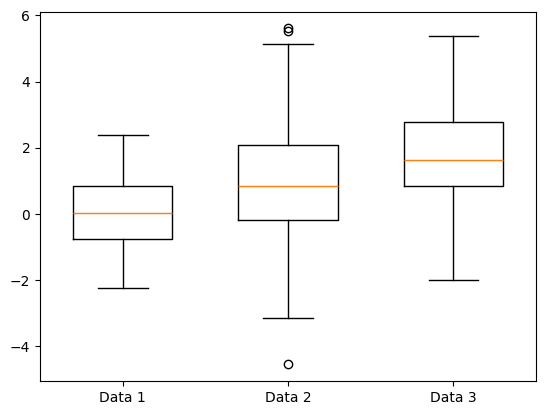

In [131]:
import matplotlib.pyplot as plt
import numpy as np

# データを生成
data1 = np.random.normal(0, 1, 100)
data2 = np.random.normal(1, 2, 100)
data3 = np.random.normal(2, 1.5, 100)

# データをリストにまとめる
data = [data1, data2, data3]

# 箱ひげ図の位置を指定
positions = [1, 2, 3]

plt.boxplot(data, positions=positions, widths=0.6)

# x軸の目盛りを設定
plt.xticks(positions, ['Data 1', 'Data 2', 'Data 3'])

# グラフを表示
plt.show()


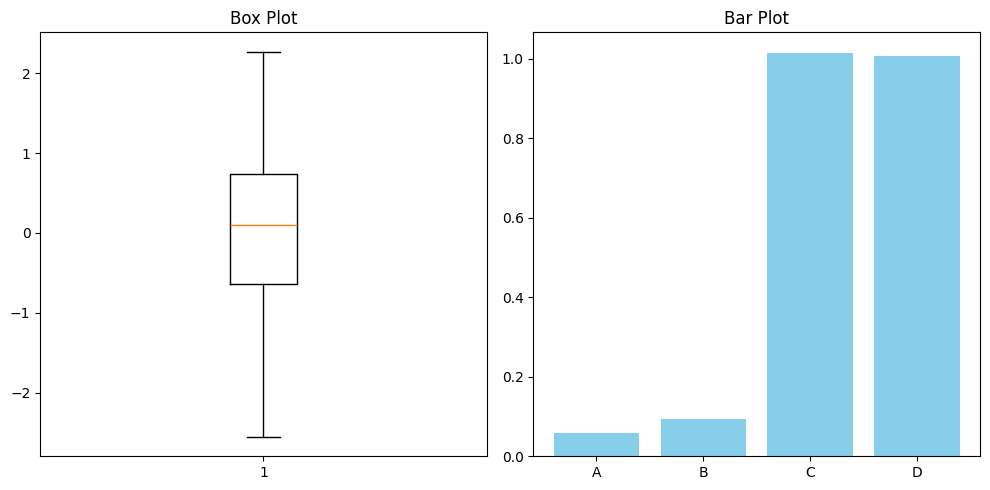

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
np.random.seed(0)
data = np.random.randn(100)

# Create the box plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.boxplot(data)
plt.title('Box Plot')

# Create the bar plot
categories = ['A', 'B', 'C', 'D']
values = [np.mean(data), np.median(data), np.var(data), np.std(data)]

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.bar(categories, values, color='skyblue')
plt.title('Bar Plot')

# Display the plots
plt.tight_layout()
plt.show()
